# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

Note: I mostly used copilot to help with my code and to edit a little of my writing as well. 

## Part 1: word counting and bag of words

In [55]:
#install spacy in the current conda environment
%pip install spacy



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
#download a small language model to help with cleaning tasks
!python3.10 -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [57]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [58]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [59]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [60]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [61]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [62]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [63]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [64]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [65]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [66]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

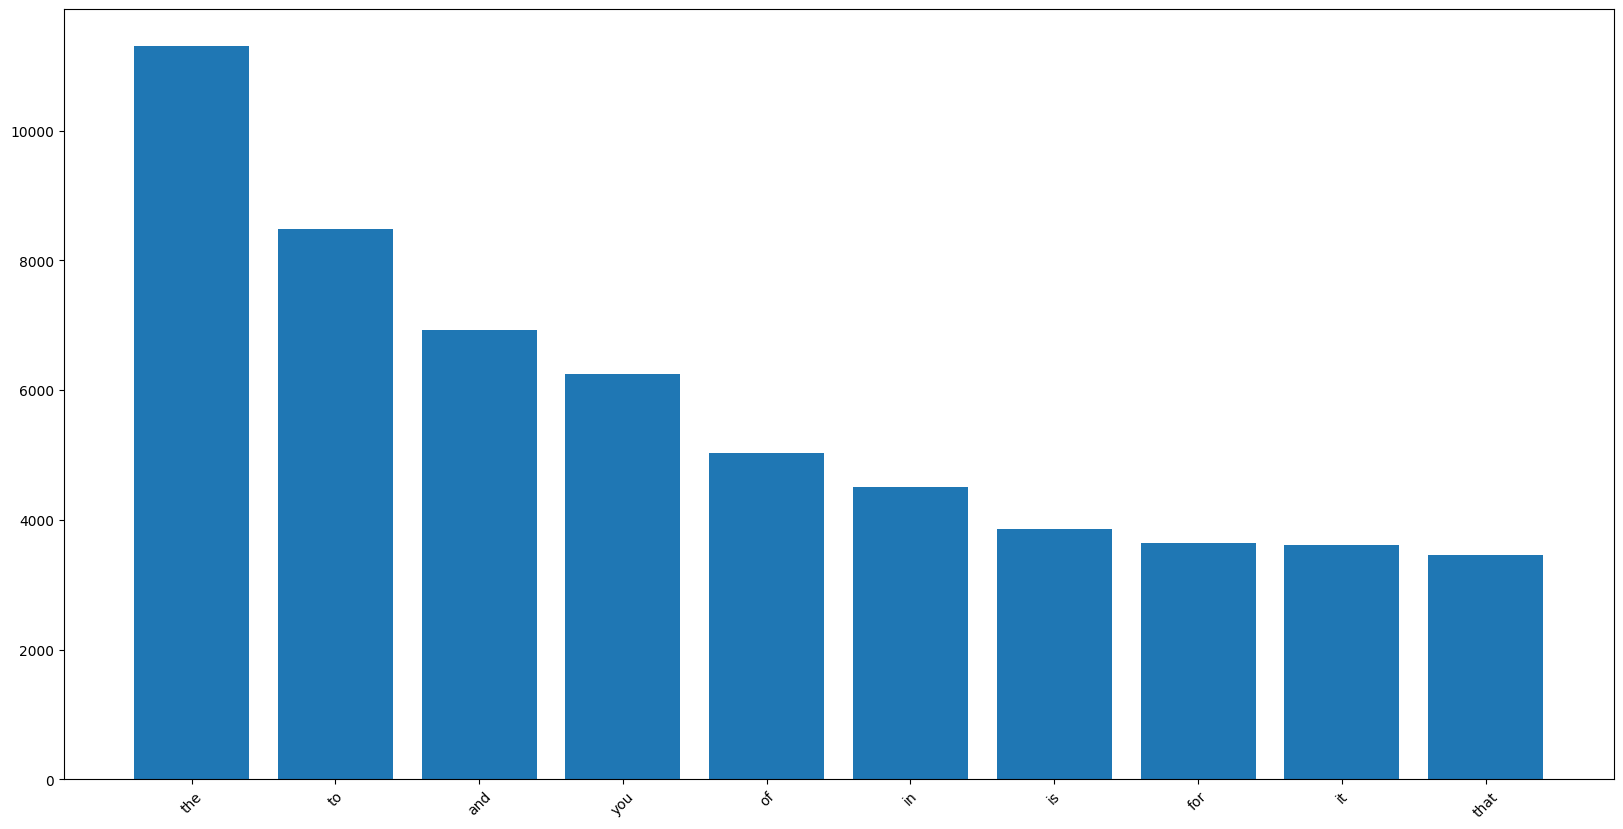

In [68]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: Many of the words shown are articles or conjunctions. These words are shorter in length and used very often in every sentence, so I am not surprised they are at the top of the most common words for this data set / plot. However, this plot is generally not useful for studying the community. There are few nouns or adjectives, which would tell me more about what topics are being discussed among the community and how people may be feeling about those topics.

#### Lemmatization and stopword removal

In [69]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [70]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [71]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [72]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [73]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [74]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

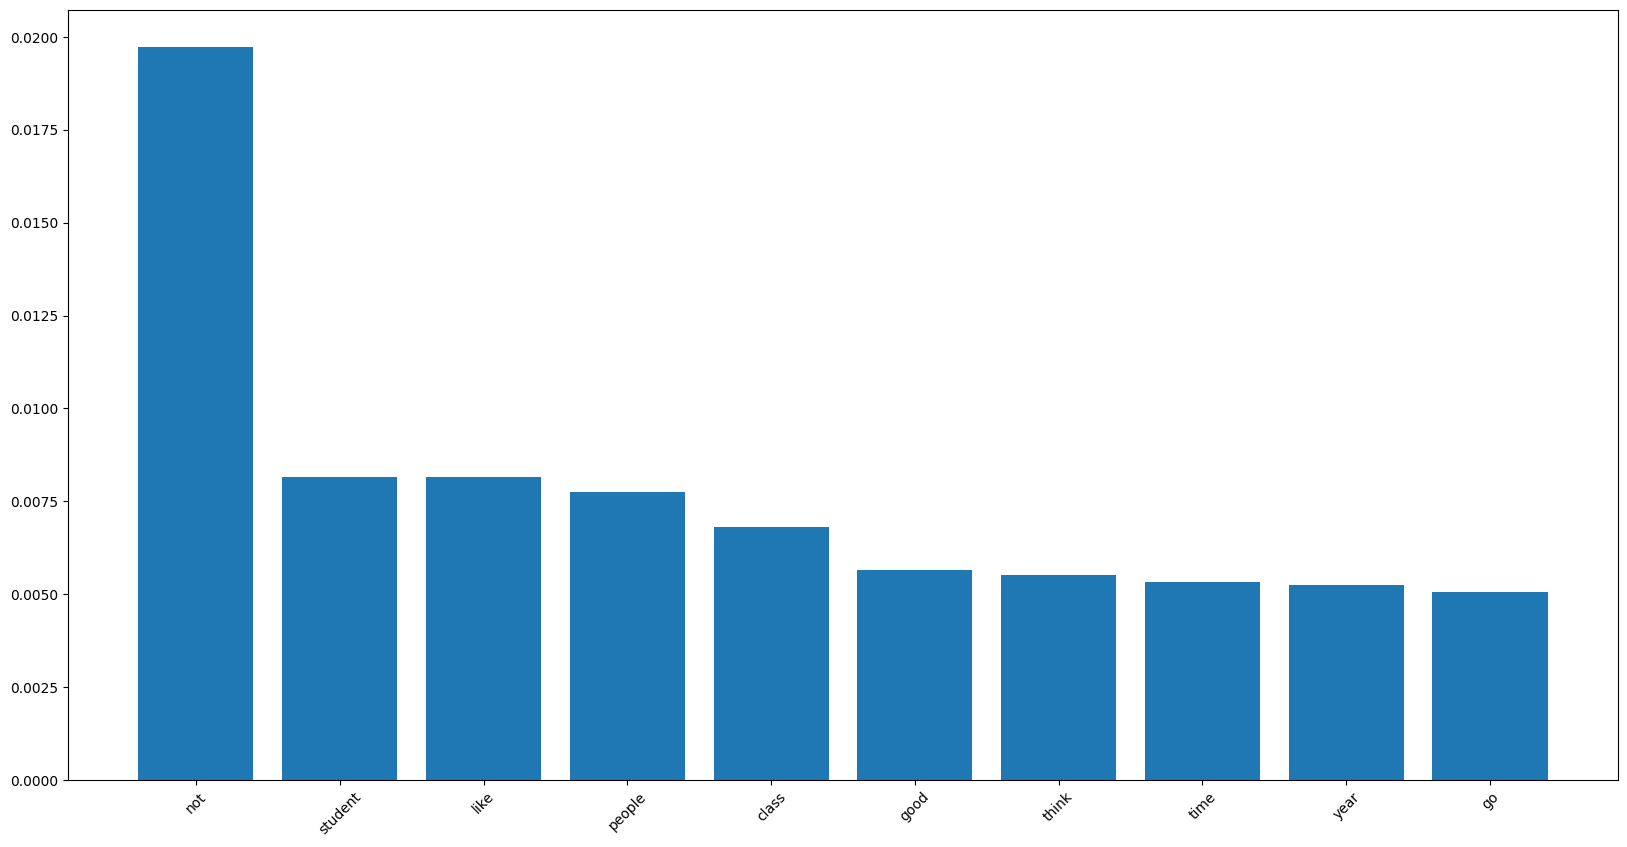

In [75]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [76]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"] 

4.138501862325838e-05

In [77]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

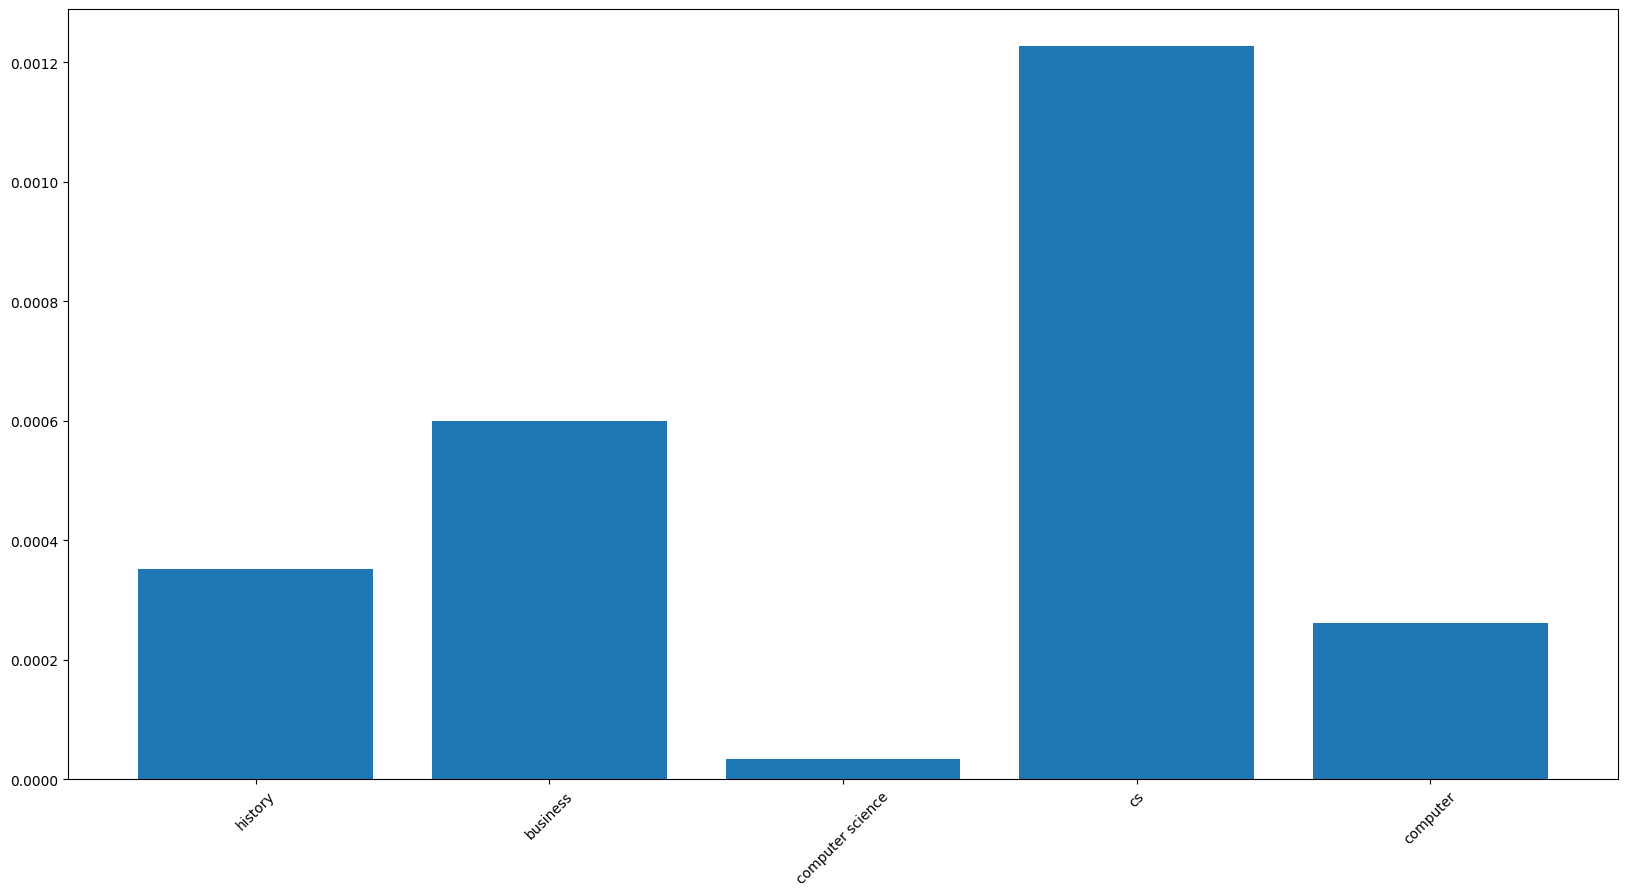

In [78]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [79]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [80]:
# comparing specific words
plot_list2=word_counts[["theater", "gym", "library", "dorm", "union"]]
plot_list2

theater    0.000034
gym        0.000207
library    0.000352
dorm       0.001076
union      0.000386
dtype: float64

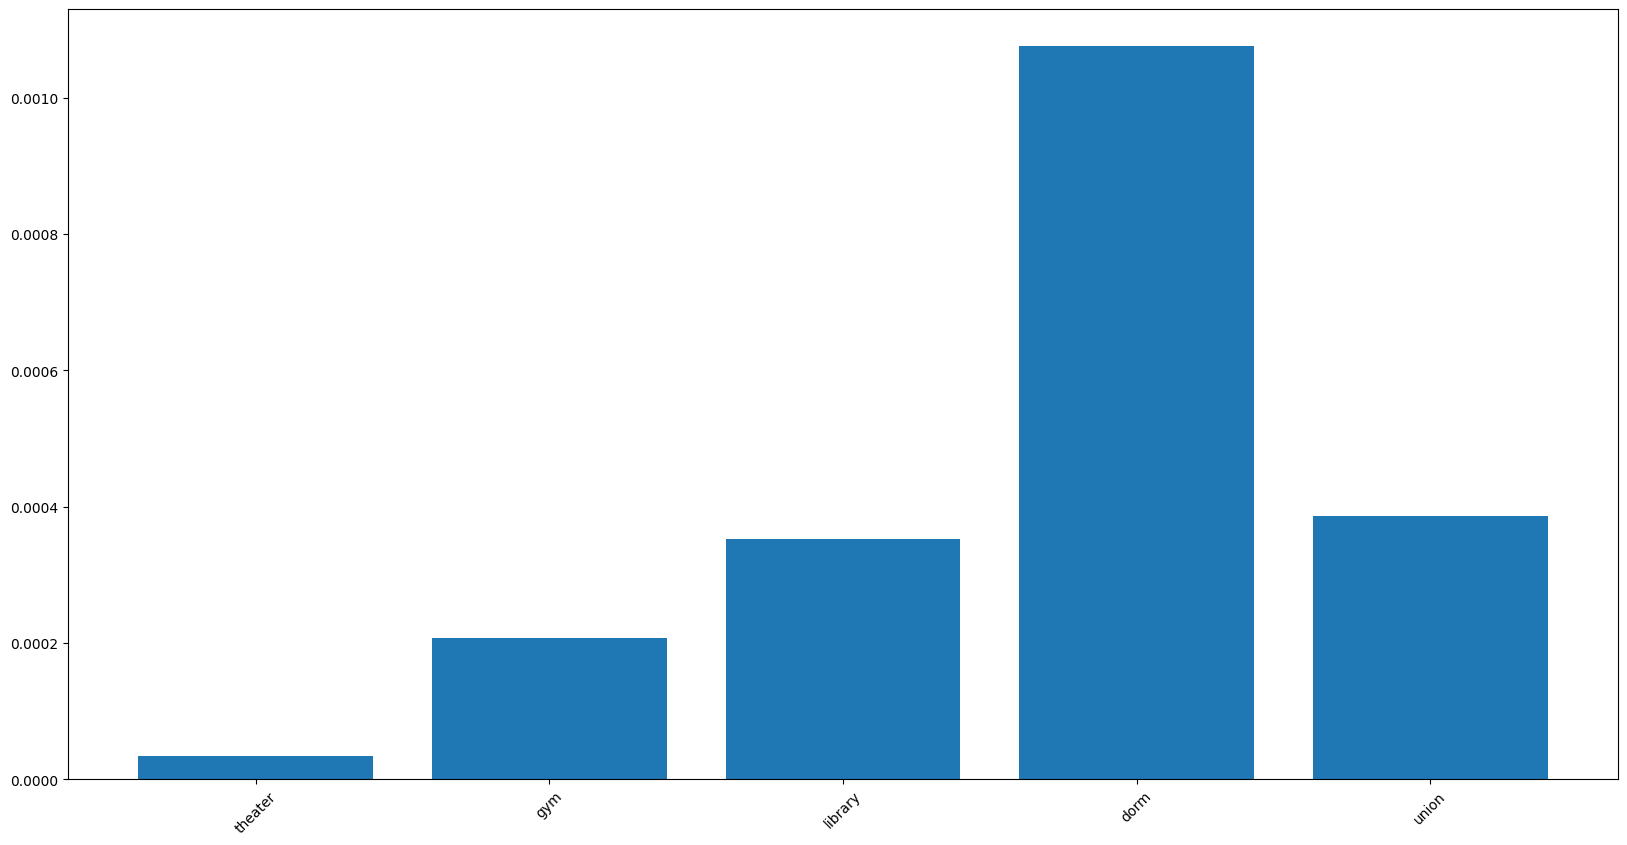

In [81]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

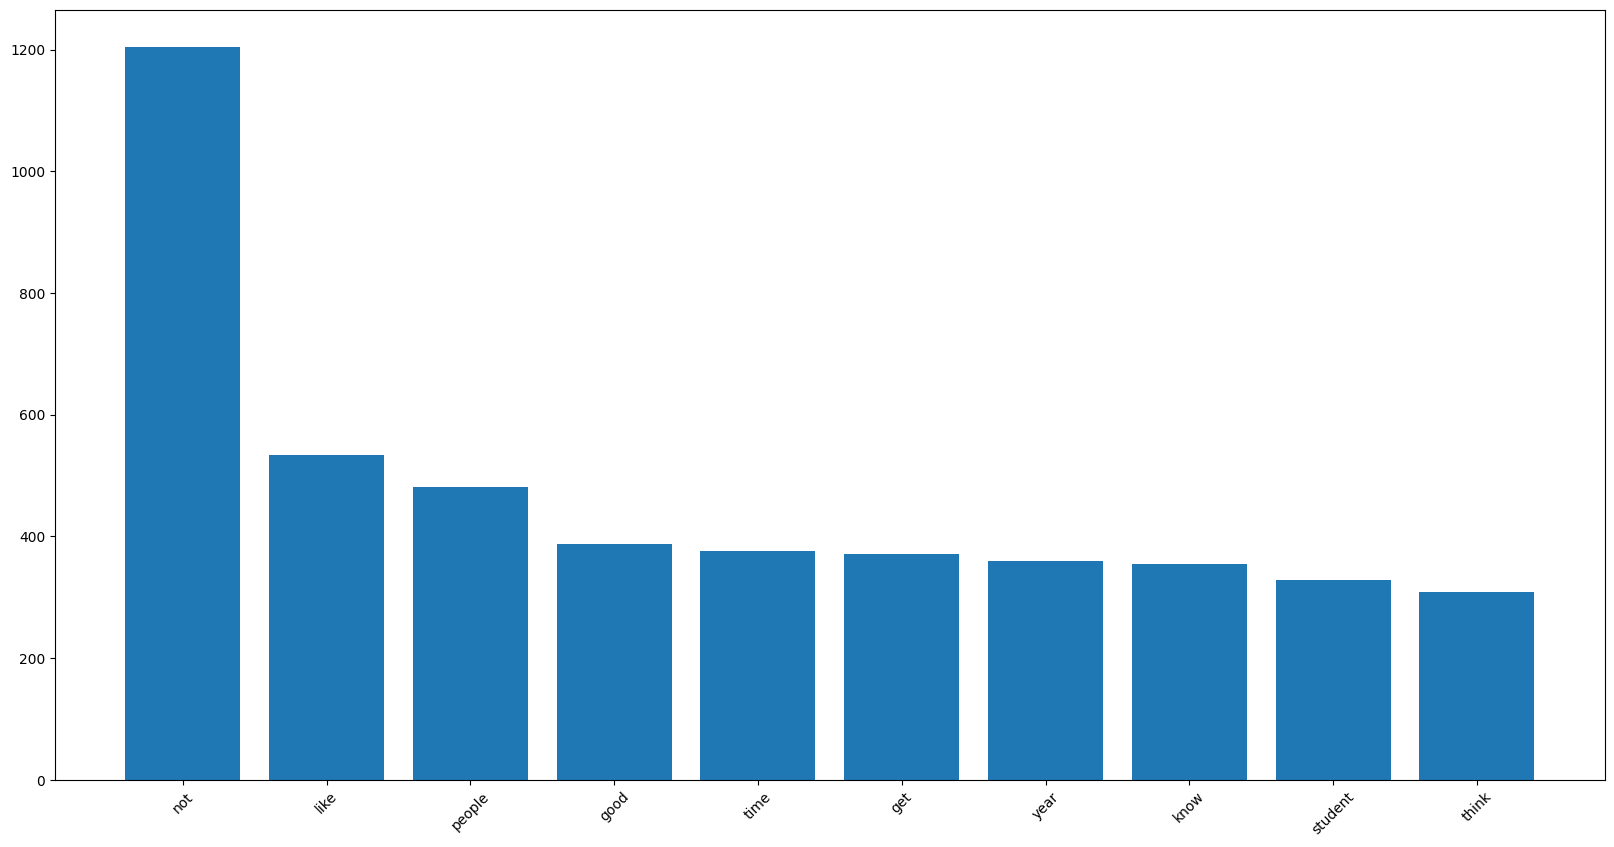

In [82]:
uiuc=pd.read_csv("uiuc.csv")

#pandas allows us to quickly apply this cleaning function to all rows in a column
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

#create a bag of words representation with count vectorizer
uiuc_vectorizer = CountVectorizer()
uiuc_bag_of_words = uiuc_vectorizer.fit_transform(uiuc['cleaned_text'])

#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
uiuc_bow_df = pd.DataFrame(uiuc_bag_of_words.toarray(), columns=uiuc_vectorizer.get_feature_names_out())
uiuc_bow_df



uiuc_language_model = spacy.load("en_core_web_sm")

#lemmatization function from the openclassrooms reading
def lemmatize_uiuc(text):
    doc = uiuc_language_model(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)


#we can further process the text by removing stopwords and lemmatizing
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize_uiuc)

uiuc_vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
uiuc_bag_of_words = uiuc_vectorizer.fit_transform(uiuc['lemmatized_text'])

#we can repeat the previous code to create a dataframe and count the words
uiuc_bow_df = pd.DataFrame(uiuc_bag_of_words.toarray(), columns=uiuc_vectorizer.get_feature_names_out())
uiuc_word_counts = uiuc_bow_df.sum()
uiuc_word_counts = uiuc_word_counts.sort_values(ascending=False)
uiuc_word_counts

#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list3 = uiuc_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list3.index, plot_list3.values)
plt.xticks(rotation=45)
plt.show()


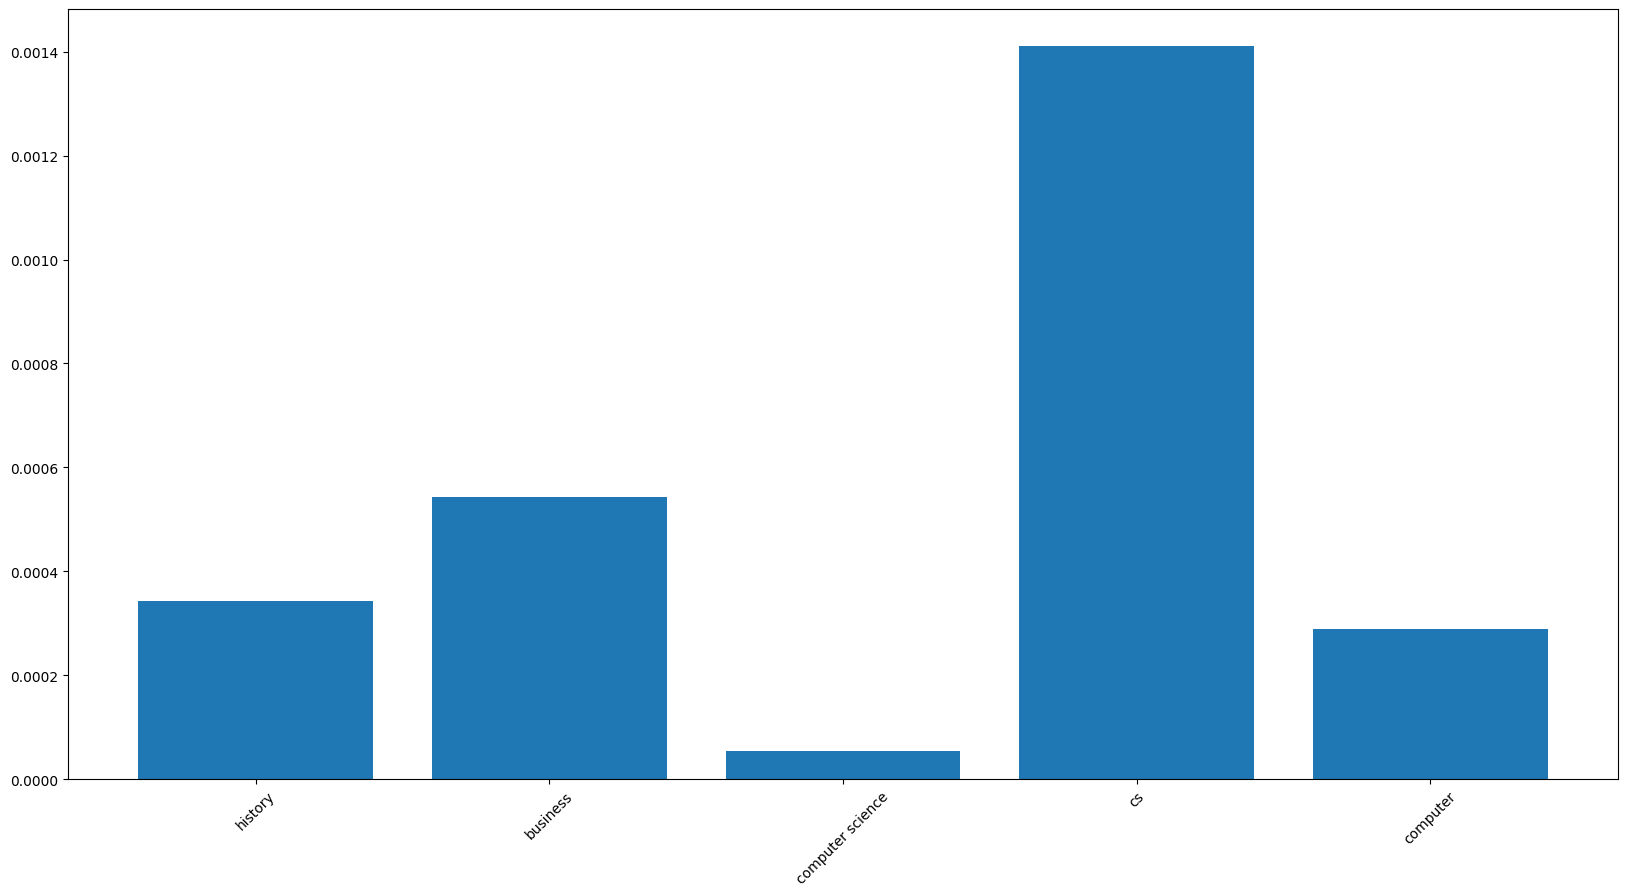

In [83]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
uiuc_word_counts = uiuc_word_counts / uiuc_word_counts.sum()

#we can also use a list of words to compare and plot specific words
plot_list4=uiuc_word_counts[["history", "business", "computer science", "cs", "computer"]]

plt.figure(figsize=(20,10))
plt.bar(plot_list4.index, plot_list4.values)
plt.xticks(rotation=45)
plt.show() 

Comparison:

CS is the most notably different column, with the percentage rising to slightly above 0.0014%, compared to the umich data that had CS at slightly above 0.0012%. 

Overall, the two graphs are quite similar (both UIUC and UMICH data) with CS being the most mentioned topic and computer science being the least mentioned topic. I believe it's because CS is just the abbreviated version for computer science and most people posting on a social media site such as reddit will not use much formal language, but more short forms instead. 

Personally, I am not surprised that computer science/cs/computer is the most relevant topic amongst college students since all students use computers and related technology very often. Also, history is not as popular of a major amongst young people, so it makes sense it would be a little less mentioned.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [84]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [85]:
#clean and lemmatize the data csv

# Load a new spacy language model for this task
data_language_model = spacy.load("en_core_web_sm")

# Function to clean data text
def clean_data(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Function to lemmatize data text
def lemmatize_data(text):
    doc = data_language_model(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)

# Clean and lemmatize the text
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_data)

In [86]:
#create a bag of words representation with count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Create a new CountVectorizer object for this task
data_vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))

# Fit the vectorizer to the lemmatized text and transform it into a bag-of-words representation
data_bag_of_words = data_vectorizer.fit_transform(data['lemmatized_text'])

# Convert the bag-of-words representation into a DataFrame
data_bow_df = pd.DataFrame(data_bag_of_words.toarray(), columns=data_vectorizer.get_feature_names_out())

In [87]:
#train a logistic regression model using the bag of words features as X and the label column as y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_bow_df, data['label'], test_size=0.2, random_state=42)

# Create a new LogisticRegression object for this task
data_logreg = LogisticRegression(max_iter=10000)

# Train the model on the training data
data_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [88]:
#report the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred = data_logreg.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.7201058201058201
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       941
           1       0.70      0.76      0.73       949

    accuracy                           0.72      1890
   macro avg       0.72      0.72      0.72      1890
weighted avg       0.72      0.72      0.72      1890

Confusion Matrix:
[[638 303]
 [226 723]]


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming data_bow_df is your bag of words DataFrame and data['label'] is your label column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_bow_df, data['label'], test_size=0.2, random_state=24)

# Create a new LogisticRegression object
data_logreg = LogisticRegression(max_iter=10000)

# Train the model on the training data
data_logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = data_logreg.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.7105820105820105
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       944
           1       0.69      0.76      0.72       946

    accuracy                           0.71      1890
   macro avg       0.71      0.71      0.71      1890
weighted avg       0.71      0.71      0.71      1890

Confusion Matrix:
[[623 321]
 [226 720]]


In [90]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

This model's accuracy is 0.716 compared to the previous 0.729, which is slightly lower / worse than the previous model. There are many reasons why it could have changed:

Overfitting: The model might be overfitting the training data and struggling with generalization. By holding out a test set, we're evaluating the model's ability to generalize, which can result in a lower accuracy.

Random Split: train_test_split randomly splits the data. When splitting data into training and testing sets, the random split might result in a test set that's more difficult for the model to classify accurately.

Model Variance: Some machine learning models, especially those with high complexity, can exhibit variance. This means that the model's performance can vary significantly depending on the specific training data it receives.

#### Part 3: Examine the top features of your model using the following code

In [91]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

In [92]:
#coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
#coefficients = coefficients.sort_values('coefficient', ascending=False)
#top_10_positive = coefficients.head(10)
#top_10_negative = coefficients.tail(10)

coefficients = pd.DataFrame({'feature': data_bow_df.columns, 'coefficient': data_logreg.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

top_10_positive

,feature,coefficient
7659,uiuc,2.781426
3306,illinois,2.295826
2867,grainger,1.903585
7766,urbana,1.885151
912,champaign,1.781392
1504,danville,1.756509
3303,illini,1.727302
6152,rsos,1.704165
26,ac,1.567154
507,basketball,1.563367


In [93]:
top_10_negative

,feature,coefficient
7235,texas,-1.649874
6138,ross,-1.670621
7753,uofm,-1.696258
160,aid,-1.716120
896,central,-1.743026
1927,eec,-1.882338
2478,fresno,-1.920696
7665,um,-2.042295
7668,umich,-2.343876
4349,michigan,-2.923911


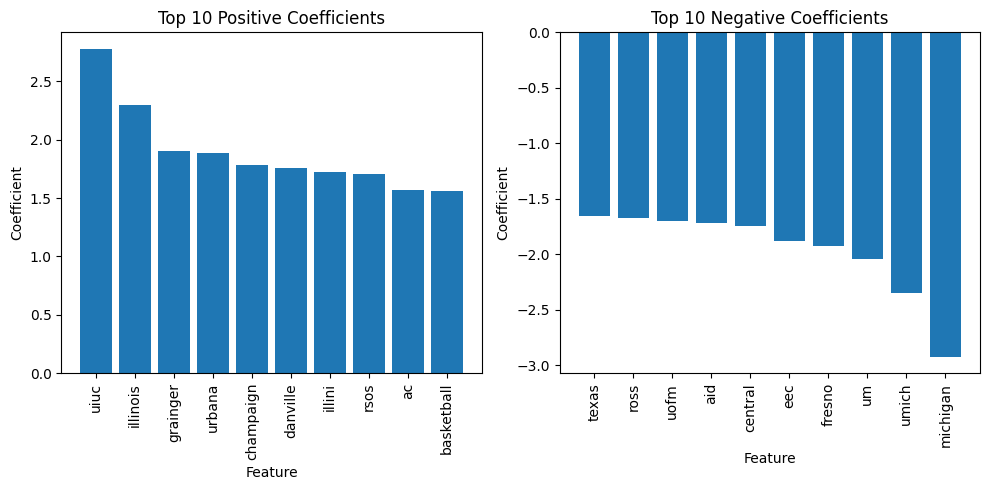

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(top_10_positive['feature'], top_10_positive['coefficient'])
plt.title('Top 10 Positive Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(top_10_negative['feature'], top_10_negative['coefficient'])
plt.title('Top 10 Negative Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Regarding the words, we notice:

The top positive coefficients reveal a strong University of Illinois affiliation, with terms like "uiuc" (2.86), "illinois" (2.10), and "urbana" (1.84) indicating a significant association. On the other hand, the top negative coefficients suggest a contrast with the University of Michigan, with terms like "umich" (-2.26) and "michigan" (-3.06) implying a rivalry. Geographic locations, such as "champaign" (1.51), also emerge as important features. This suggests the model is using university identity and location to make predictions. The coefficients provide interesting insight into the model's decision-making process.

In [95]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

The words make sense. The identified words effectively differentiate UIUC from UMich through unique identifiers such as geographic location, university name, sports teams, and college names. UIUC-specific terms like "uiuc", "illinois", and "illini" have positive coefficients, while University of Michigan-related terms like "umich", "michigan", and "wolverine" have negative coefficients. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [96]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

uiuc_bag_of_words

<4725x3891 sparse matrix of type '<class 'numpy.int64'>'
	with 49429 stored elements in Compressed Sparse Row format>

In [97]:
corpus = Sparse2Corpus(uiuc_bag_of_words, documents_columns=False)

In [98]:
id2word = dict((v, k) for k, v in uiuc_vectorizer.vocabulary_.items())

In [99]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

In [100]:
lda_model.print_topics()

[(0,
  '0.027*"not" + 0.012*"student" + 0.011*"work" + 0.009*"uiuc" + 0.009*"tap" + 0.009*"like" + 0.008*"time" + 0.007*"tap water" + 0.007*"week" + 0.007*"thing"'),
 (1,
  '0.055*"not" + 0.023*"class" + 0.018*"think" + 0.011*"week" + 0.011*"people" + 0.011*"hour" + 0.010*"start" + 0.010*"know" + 0.009*"need" + 0.009*"feel"'),
 (2,
  '0.016*"not" + 0.011*"interested" + 0.010*"like" + 0.009*"company" + 0.008*"year" + 0.008*"good" + 0.007*"trust" + 0.007*"need" + 0.007*"hall" + 0.007*"ppl"'),
 (3,
  '0.026*"thank" + 0.021*"find" + 0.019*"like" + 0.013*"look" + 0.013*"not" + 0.011*"know" + 0.007*"student" + 0.007*"lol" + 0.007*"people" + 0.006*"dollar"'),
 (4,
  '0.019*"people" + 0.019*"good" + 0.011*"know" + 0.011*"try" + 0.010*"campus" + 0.009*"not" + 0.008*"housing" + 0.008*"friend" + 0.008*"like" + 0.007*"safe"'),
 (5,
  '0.066*"water" + 0.017*"not" + 0.012*"bad" + 0.011*"friend" + 0.008*"hot" + 0.008*"people" + 0.008*"send" + 0.007*"ask" + 0.007*"house" + 0.007*"charge"'),
 (6,
  '0.

Based on the top words in each of the 10 topics, it seems as if the themes vary for each topic significantly. This is my best educated guess for each topic:

Topic 0: Campus Life and Social Interactions<br>
Topic 1: University Events and Services<br>
Topic 2: Academics and Daily Struggles<br>
Topic 3: Social Relationships and Environment<br>
Topic 4: Gratitude and Transportation<br>
Topic 5: Emotions and Social Dynamics<br>
Topic 6: Well-wishes<br>
Topic 7: Weather (not great)<br>
Topic 8: Academic Life and Schedule<br>
Topic 9: Student Community and Social Interactions<br>